In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

In [67]:
lp_data21 = pd.read_csv('C:/Users/user/Desktop/데분/living_pop2021.csv', encoding = 'cp949')
lp_data22 = pd.read_csv('C:/Users/user/Desktop/데분/living_pop2022.csv', encoding = 'utf-8')
small_city = pd.read_csv('C:/Users/user/Desktop/데분/좆좆좆소도시.csv', encoding = 'cp949')

In [68]:
lp_data = pd.merge(lp_data21,lp_data22, how = 'inner', on = '행정구역')

In [69]:
lp_data.drop(lp_data.iloc[:,:1], axis = 1, inplace = True)
small_city.drop(small_city[['cluster']], axis = 1, inplace = True)

In [27]:
lp_data['21생활인구평균'] = lp_data.iloc[:,1:13].mean()
lp_data['22생활인구평균'] = lp_data.iloc[:,14:].mean()

In [147]:
df = pd.merge(small_city,lp_data, how = 'inner', on = '행정구역')

In [94]:
lp21 = pd.concat([df.iloc[:, 0], df.iloc[:, -24:-12]], axis=1)
lp22 = pd.concat([df.iloc[:, 0], df.iloc[:, -12:]], axis=1)

In [119]:
lp21.set_index('행정구역', inplace=True)
lp22.set_index('행정구역', inplace=True)

In [175]:
monthly_mean21 = lp21.mean(axis=0)
monthly_mean22 = lp22.mean(axis=0)

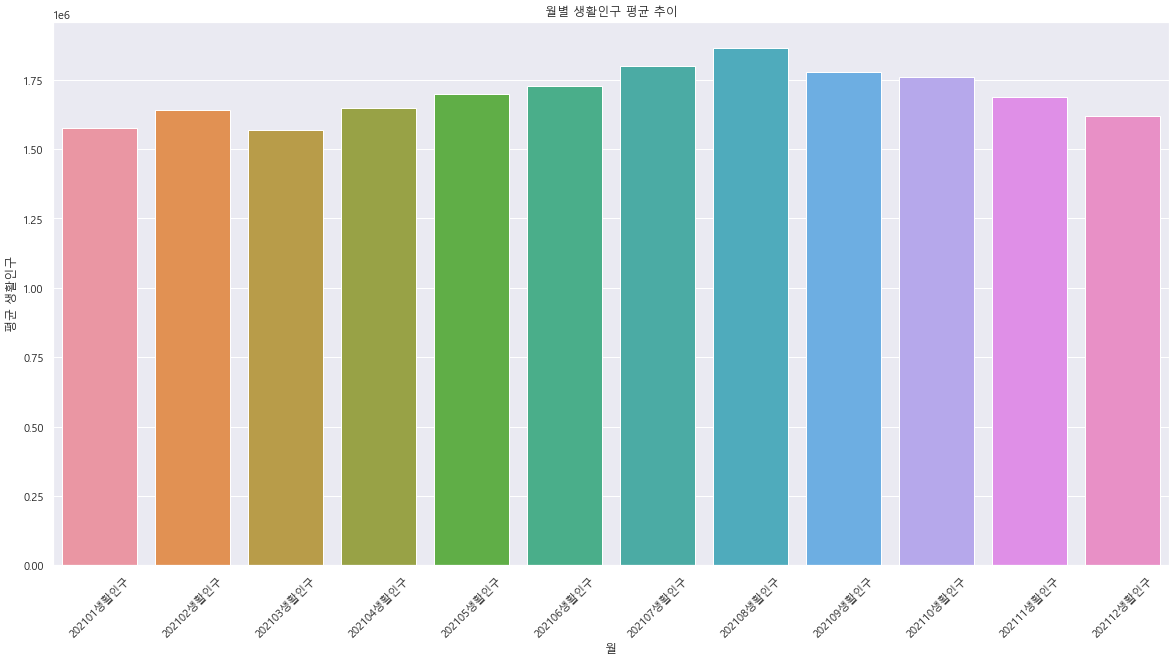

In [138]:
import seaborn as sns

# 그래프의 크기를 설정합니다.
plt.figure(figsize=(20,10))

# 평균 그래프 그리기
sns.barplot(x=monthly_mean21.index, y=monthly_mean21.values)

# 그래프 제목 및 레이블 설정
plt.title('월별 생활인구 평균 추이')
plt.xlabel('월')
plt.ylabel('평균 생활인구')
plt.xticks(rotation=45)  # x 축 레이블 회전

plt.show()

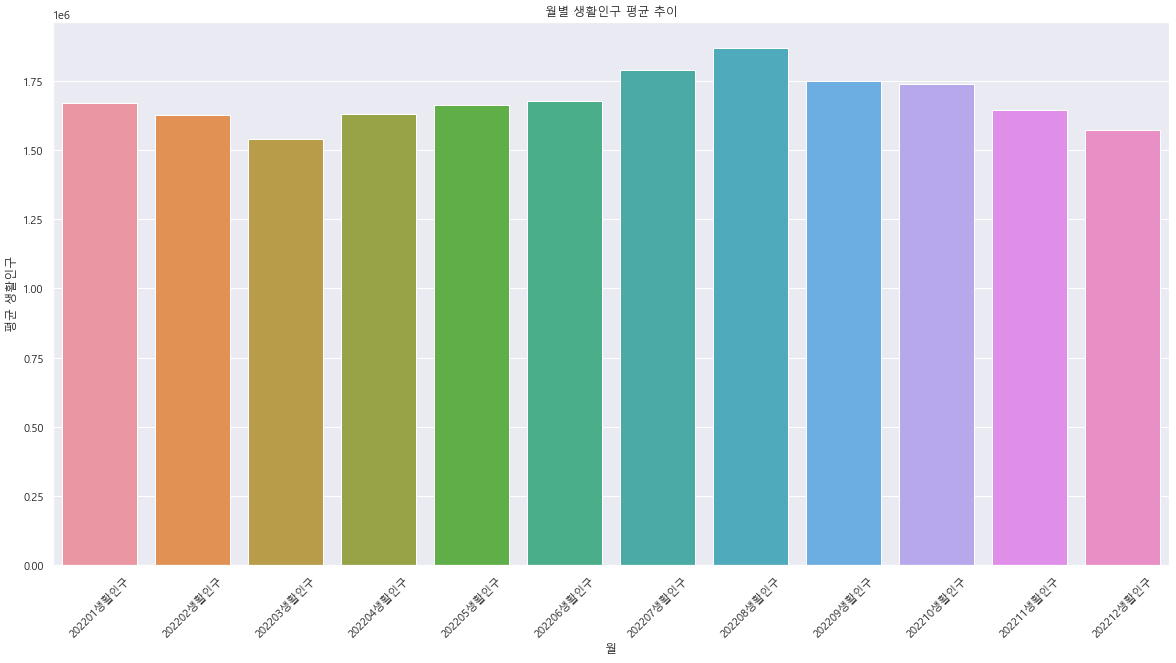

In [140]:
import seaborn as sns

# 그래프의 크기를 설정합니다.
plt.figure(figsize=(20,10))

# 평균 그래프 그리기
sns.barplot(x=monthly_mean22.index, y=monthly_mean22.values)

# 그래프 제목 및 레이블 설정
plt.title('월별 생활인구 평균 추이')
plt.xlabel('월')
plt.ylabel('평균 생활인구')
plt.xticks(rotation=45)  # x 축 레이블 회전

plt.show()

# 상관관계

In [156]:
x21 = df.iloc[:,-24:-12]
x22 = df.iloc[:,-12:]

In [161]:
df['21생활인구평균'] = x21.mean(axis = 1)
df['22생활인구평균'] = x22.mean(axis = 1)

In [170]:
df.drop(df.iloc[:,-26:-2], axis = 1, inplace = True)

In [171]:
df.corr()

,2023년06월_거주자 인구수,2023년06월_세대수,2023년06월_세대당 인구,전입인구(2022.1~2023.5),전출인구(2022.1~2023.5),인구만명당_2020_사업체수,인구만명당_2021_사업체수,2020_인구천명당_의료기관병상수,2021_인구천명당_의료기관병상수,2020_인구십만명당_문화기반시설수,...,2022_인구천명당_사설학원수,인구만명당_2022_초등학교수,인구만명당_2023_초등학교수,2021_주택수,2022_주택수,지방소멸위험도,2021출산율,2022출산율,21생활인구평균,22생활인구평균
2023년06월_거주자 인구수,1.000000,0.991608,0.151870,0.779993,0.780110,-0.765267,-0.768877,0.017403,0.013021,-0.126667,...,0.375500,-0.007246,-0.007246,0.966620,0.966056,-0.126144,0.078594,0.004814,0.715267,0.713549
2023년06월_세대수,0.991608,1.000000,0.030129,0.754376,0.733576,-0.752348,-0.756760,0.028428,0.021187,-0.130284,...,0.309531,-0.050679,-0.050679,0.967706,0.965815,-0.220490,0.067508,-0.008077,0.668084,0.670571
2023년06월_세대당 인구,0.151870,0.030129,1.000000,0.246068,0.408849,-0.321375,-0.314274,-0.037888,-0.017274,0.072038,...,0.591273,0.341181,0.341181,0.070675,0.078120,0.681704,0.186674,0.222843,0.362149,0.325118
전입인구(2022.1~2023.5),0.779993,0.754376,0.246068,1.000000,0.933383,-0.505693,-0.506707,-0.019224,-0.020674,0.073286,...,0.181607,0.195068,0.195068,0.696354,0.697931,0.265858,0.145336,0.142486,0.770473,0.760125
전출인구(2022.1~2023.5),0.780110,0.733576,0.408849,0.933383,1.000000,-0.537461,-0.537480,-0.075147,-0.076592,0.051120,...,0.321847,0.275214,0.275214,0.683101,0.685207,0.423431,0.224729,0.211634,0.802469,0.775844
인구만명당_2020_사업체수,-0.765267,-0.752348,-0.321375,-0.505693,-0.537461,1.000000,0.998746,-0.092519,-0.096786,0.209494,...,-0.455706,-0.027906,-0.027906,-0.759200,-0.758211,0.197795,-0.210020,-0.224933,-0.481754,-0.464391
인구만명당_2021_사업체수,-0.768877,-0.756760,-0.314274,-0.506707,-0.537480,0.998746,1.000000,-0.076709,-0.080263,0.201545,...,-0.463606,-0.004352,-0.004352,-0.765522,-0.764530,0.198362,-0.194389,-0.214494,-0.494412,-0.478218
2020_인구천명당_의료기관병상수,0.017403,0.028428,-0.037888,-0.019224,-0.075147,-0.092519,-0.076709,1.000000,0.989067,-0.020298,...,0.110850,0.297193,0.297193,0.029642,0.028106,-0.175223,0.291209,0.047567,-0.355292,-0.356647
2021_인구천명당_의료기관병상수,0.013021,0.021187,-0.017274,-0.020674,-0.076592,-0.096786,-0.080263,0.989067,1.000000,-0.003356,...,0.125418,0.351441,0.351441,0.024669,0.023312,-0.163457,0.263098,0.022829,-0.360958,-0.361170
2020_인구십만명당_문화기반시설수,-0.126667,-0.130284,0.072038,0.073286,0.051120,0.209494,0.201545,-0.020298,-0.003356,1.000000,...,0.262594,-0.105359,-0.105359,-0.172124,-0.173456,0.456108,-0.102835,-0.045477,-0.039967,-0.036675


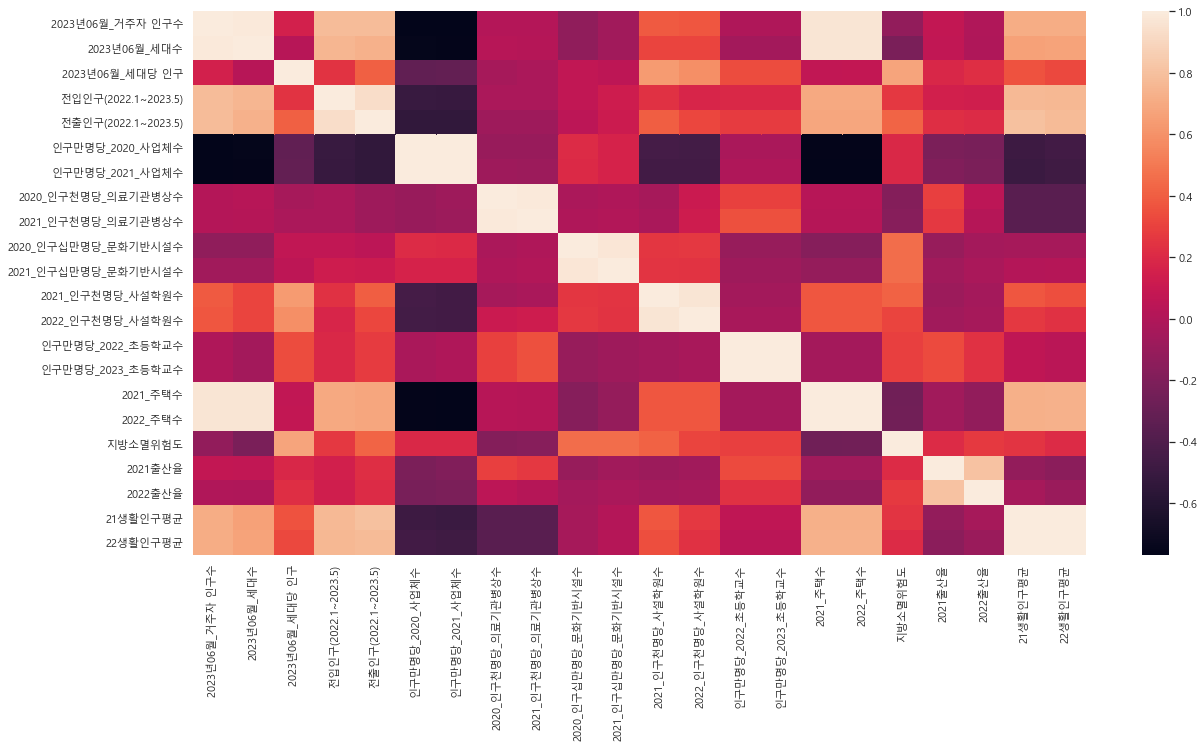

In [174]:
plt.figure(figsize=(20,10))

sns.heatmap(df.corr())

plt.show()